In [1]:
cd ../..

c:\Users\capett\sas-trustworthy-ai-examples


In [2]:
from python.utils.preprocessing import load_data, handle_missing_values, detect_column_types, encode_categorical_data, scale_features, feature_selection, split_data, correlation_matrix, identify_proxy_variables, frequency_distribution

In [3]:
data = load_data('data/heart_disease.csv')

data.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex,cp,exang,slope,thal,restecg,fbs,target
0,63,145,233,150,2.3,0.0,1,3,0,0,1,0,1,0
1,67,160,286,108,1.5,3.0,1,0,1,1,2,0,0,1
2,67,120,229,129,2.6,2.0,1,0,1,1,0,0,0,1
3,37,130,250,187,3.5,0.0,1,2,0,0,2,1,0,0
4,41,130,204,172,1.4,0.0,0,1,0,2,2,0,0,0


In [4]:
processed_data = handle_missing_values(data, strategy='mean')

processed_data.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex,cp,exang,slope,thal,restecg,fbs,target
0,63,145,233,150,2.3,0.0,1,3,0,0,1,0,1,0
1,67,160,286,108,1.5,3.0,1,0,1,1,2,0,0,1
2,67,120,229,129,2.6,2.0,1,0,1,1,0,0,0,1
3,37,130,250,187,3.5,0.0,1,2,0,0,2,1,0,0
4,41,130,204,172,1.4,0.0,0,1,0,2,2,0,0,0


In [5]:
encoded_data = encode_categorical_data(processed_data, method='ordinal')

encoded_data.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex,cp,exang,slope,thal,restecg,fbs,target
0,63,145,233,150,2.3,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,67,160,286,108,1.5,4.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
2,67,120,229,129,2.6,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,37,130,250,187,3.5,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0
4,41,130,204,172,1.4,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0


In [7]:
scaled_data = scale_features(encoded_data, method='normalize', exclude_cols=['target'])

scaled_data.head()

,ca,sex,cp,exang,slope,thal,restecg,fbs,target,age,trestbps,chol,thalch,oldpeak
0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.714286,0.481132,0.244292,0.603053,0.370968
1,4.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.795918,0.622642,0.365297,0.282443,0.241935
2,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.795918,0.245283,0.235160,0.442748,0.419355
3,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.183673,0.339623,0.283105,0.885496,0.564516
4,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.265306,0.339623,0.178082,0.770992,0.225806


In [10]:
final_data = feature_selection(scaled_data, target_col='target', k=10, method='classification')

final_data.head()

,ca,sex,cp,exang,slope,thal,age,trestbps,thalch,oldpeak,target
0,0.0,1.0,3.0,0.0,0.0,1.0,0.714286,0.481132,0.603053,0.370968,0.0
1,4.0,1.0,0.0,1.0,1.0,2.0,0.795918,0.622642,0.282443,0.241935,1.0
2,3.0,1.0,0.0,1.0,1.0,0.0,0.795918,0.245283,0.442748,0.419355,1.0
3,0.0,1.0,2.0,0.0,0.0,2.0,0.183673,0.339623,0.885496,0.564516,0.0
4,0.0,0.0,1.0,0.0,2.0,2.0,0.265306,0.339623,0.770992,0.225806,0.0


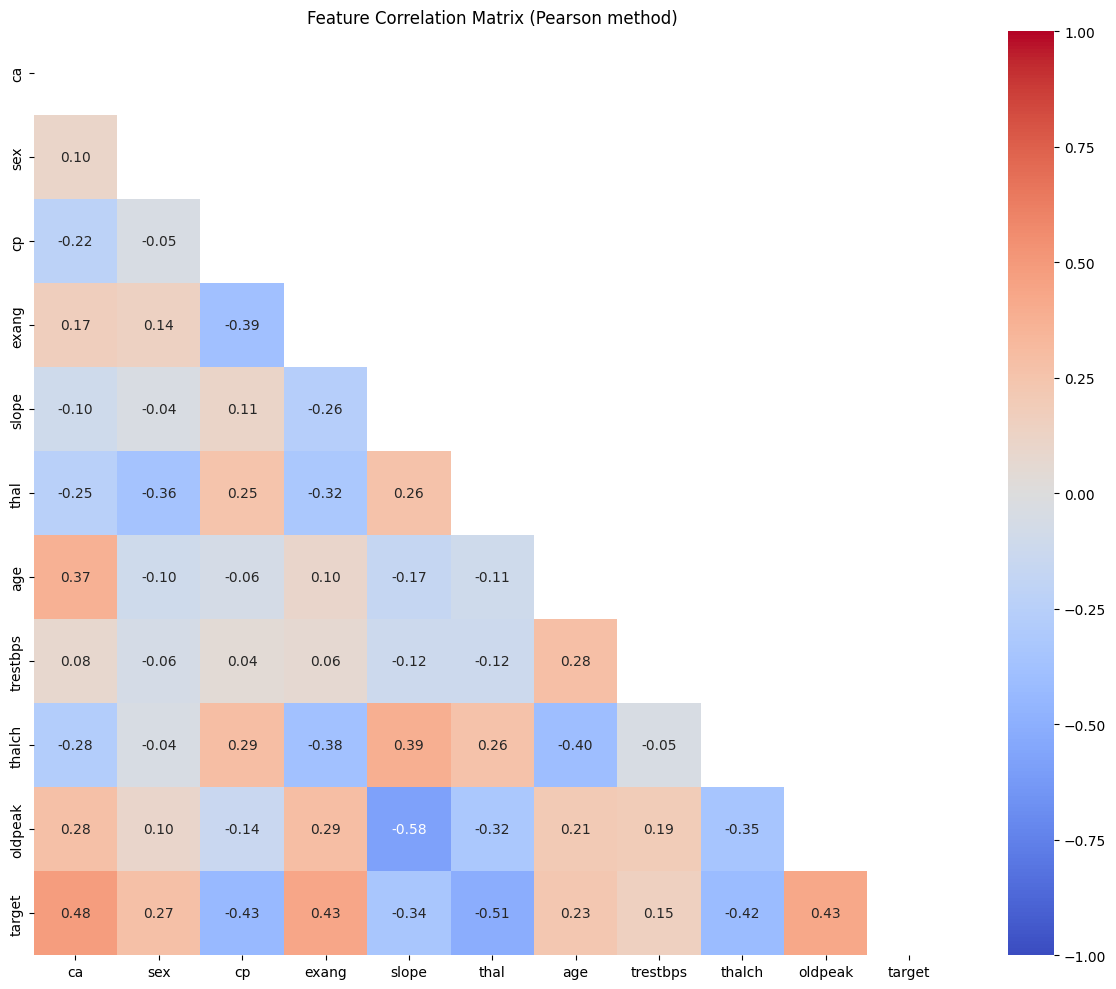

In [11]:
corr_matrix, high_corr_pairs = correlation_matrix(final_data, method='pearson', threshold=0.7, plot=True)

In [12]:
proxy_dict = identify_proxy_variables(final_data, ['sex', 'age'])

proxy_dict.items()

dict_items([('sex', []), ('age', [])])

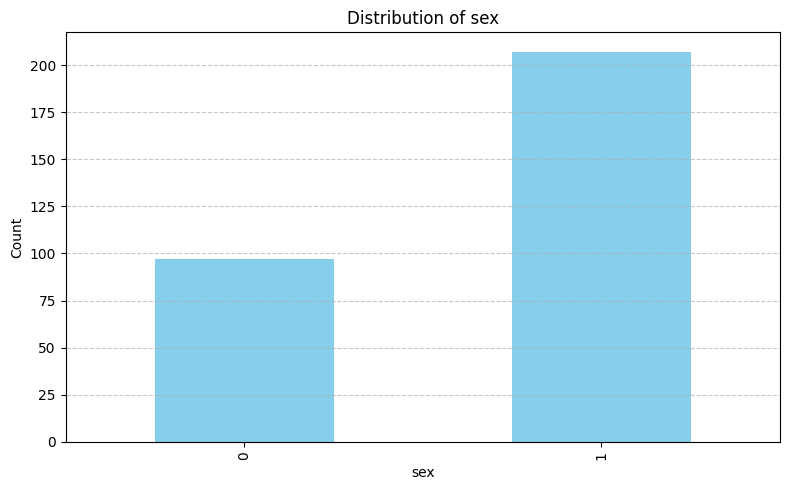

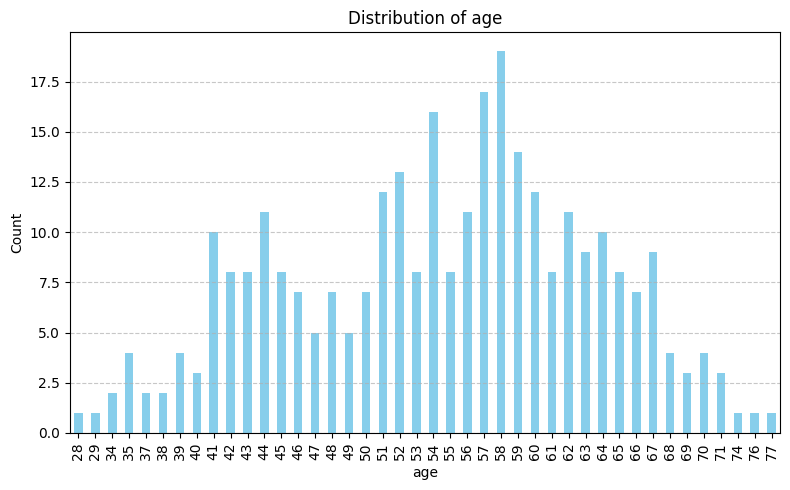

In [13]:
dist_dict = frequency_distribution(processed_data, ['sex', 'age'], plot=True)

In [15]:
X_train, X_test, y_train, y_test = split_data(final_data, target_col='target', test_size=0.2)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_test.shape[1] if X_train.shape[1] == X_test.shape[1] else -1}")

Training set size: 243 samples
Test set size: 61 samples
Number of features: 10
